In [1]:
a = 1

In [1]:
import pandas as pd
import recursos as rc

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
help(rc.mapa_correlaciones)

Help on function mapa_correlaciones in module recursos:

mapa_correlaciones(data, corr_type: str)
    Muestra la correlacion entre variables generando un mapa de calor y
    ademas muestra el valor de correlacion entre variables
    
    data[Dataframe]     : Set de datos tipo pandas
    corr_type[String]   : tipo de correlacion que usaremos (tenemos 3 opciones)
                                - pearson
                                - kendall
                                - spearman
    
    Default:
        corr_type = 'pearson



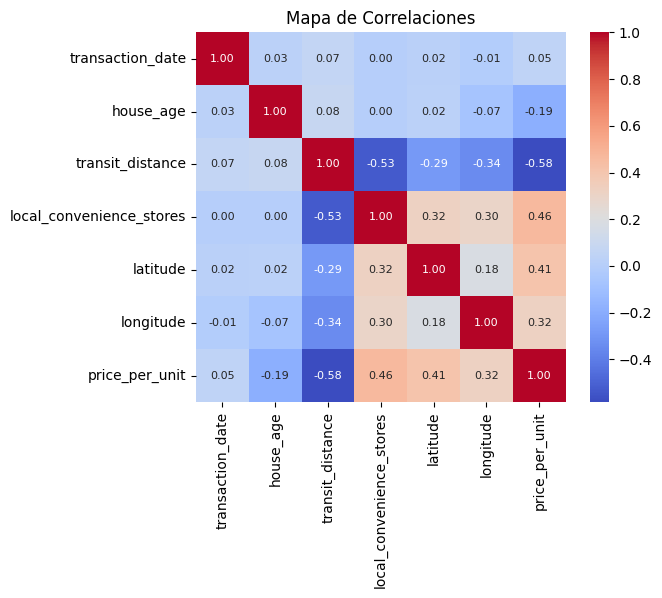

In [4]:
rc.mapa_correlaciones(data,'kendall')

In [14]:
rc.set_cuantiles(data,[0.15*x for x in range(0,7)])

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.600
0.15,2012.833,4.895,187.48230,0.0,24.954678,121.514531,23.195
0.30,2012.917,11.890,329.97470,2.0,24.963839,121.531478,29.790
0.45,2013.083,14.700,461.10160,4.0,24.968649,121.537580,37.170
0.60,2013.250,17.600,640.73910,5.0,24.974238,121.540690,41.200
0.75,2013.417,28.150,1454.27900,6.0,24.977455,121.543305,46.600
0.90,2013.500,34.670,2697.66270,8.0,24.982442,121.547220,54.940


c:\Users\personal\Documents\LIBROS\HENRY DTF - 03\Textos\MICROSOFT LEAR\RUTA 1 - ML\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:147: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


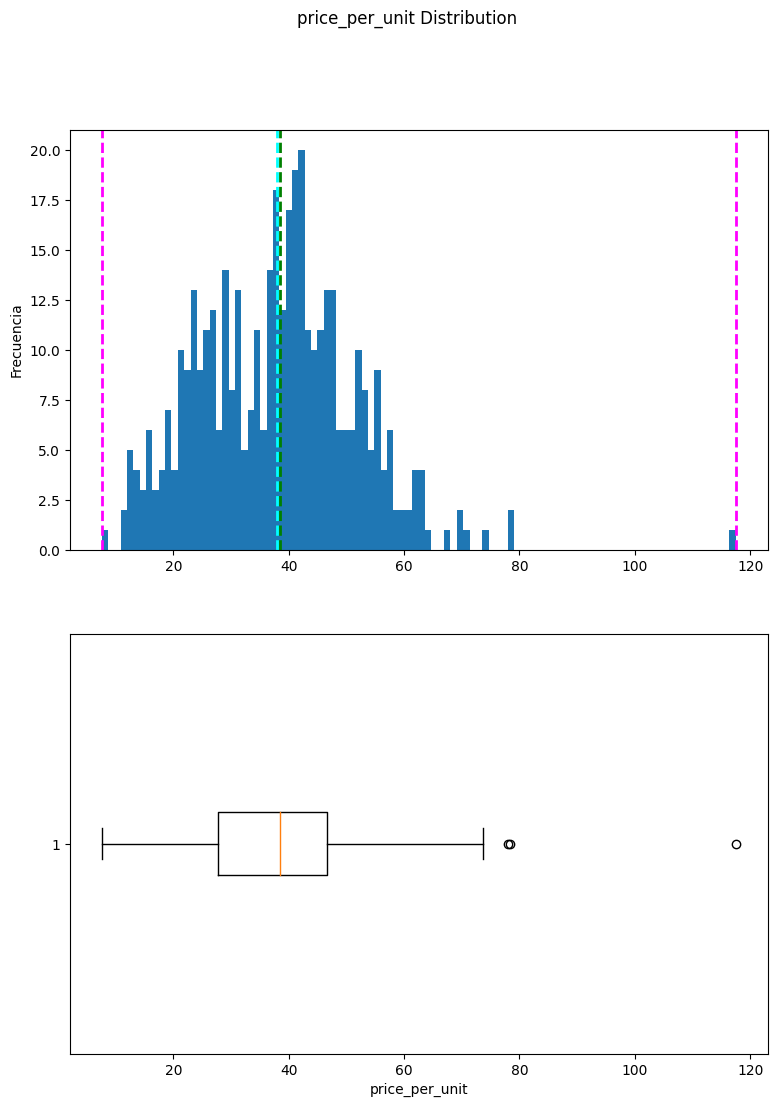

In [6]:
rc.distribution_Data(data.price_per_unit)

In [26]:
help(rc.cut_cuantiles)

Help on function cut_cuantiles in module recursos:

cut_cuantiles(data, name_column: str, rango: float, type_cut=True, less_equal=True)
    Selecciona datos menores o mayores para cierto umbral de cuantiles
    data [Dataframe]   : Set de datos en formato pandas
    name_column [str]   : Nombre de la columna a recortar (debe encontrarse dentro del set de datos)
    type_cut [Bool]     : Tipo de recorte:
                            True --> rangos cuantilicos
                            False --> rangos numericos 
    rangos [float]      : Rango de recorte 
    less_equal [bool]   : Recorte:
                            True  --> menor igual que el rango
                            False --> mayor igual que el rango
    
    Por defecto:
        type_cute --> True, less_equal --> True



In [4]:
data = rc.cut_cuantiles(data= data, name_column='price_per_unit', type_cut= True, rango= 0.25, less_equal=True)
rc.set_cuantiles(data= data, cuantils_list=None )

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,4.800,393.2606,0.00,24.938850,121.473530,7.600
0.10,2012.750,10.790,1153.3871,0.00,24.941550,121.495672,13.140
0.25,2012.917,14.250,1580.7450,0.00,24.947623,121.503420,15.950
0.50,2013.083,17.200,2408.9930,0.00,24.954310,121.513590,20.750
0.75,2013.417,25.825,4082.0150,2.75,24.962013,121.530390,22.975
0.95,2013.583,31.730,5512.0380,4.00,24.972238,121.559640,24.615
1.00,2013.583,33.500,6488.0210,6.00,24.990060,121.566270,24.700


In [4]:
rc.set_cuantiles(data,)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0.00,2012.667,0.000,23.38284,0.0,24.932070,121.473530,7.60
0.10,2012.750,3.600,157.19690,0.0,24.951200,121.512325,20.90
0.25,2012.917,9.100,289.32480,1.0,24.962990,121.527600,27.30
0.50,2013.167,16.150,492.94415,4.0,24.971100,121.538535,38.25
0.75,2013.417,28.050,1463.12275,6.0,24.977998,121.543222,46.10
0.95,2013.583,37.765,4082.01500,9.0,24.985716,121.549098,57.66
1.00,2013.583,43.800,6488.02100,10.0,25.014590,121.566270,69.70


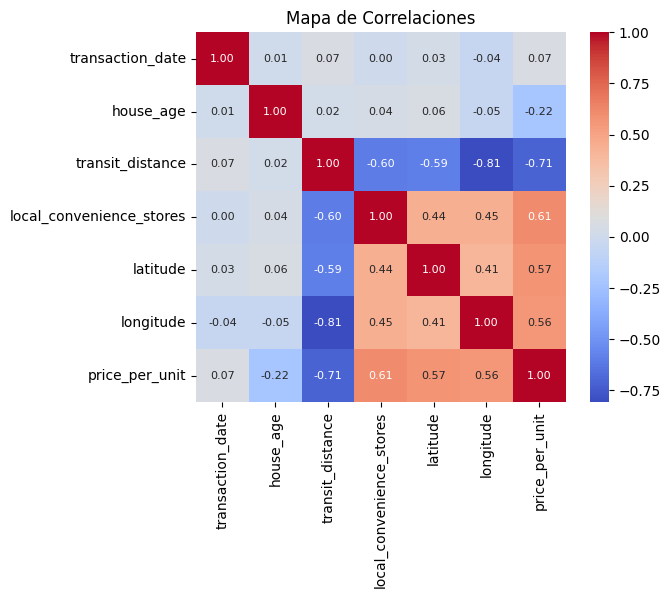

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
    
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm').set_title('Mapa de Correlaciones')
plt.show()

In [7]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [3]:
help(rc.box_and_whisker)

Help on function box_and_whisker in module recursos:

box_and_whisker(df: pandas.core.frame.DataFrame, label_x: Optional[str] = None, label_y: Optional[str] = None, label_x2: Optional[str] = None, title=None, show: bool = False)
    Crea un diagrama de caja y bigotes y, opcionalmente, lo muestra. Devuelve la cifra de esa parcela.
    
     Tenga en cuenta que si llama a esto desde cuadernos jupyter y no captura la salida
     aparecerá en la pantalla como si se hubiera llamado `.show()`
    
    df: Los datos
    label_x: Por qué agrupar. Predeterminado a Ninguno
    label_y: Qué trazar en el eje y. Predeterminado para contar df.columns[0]
    label_x2: si se proporciona, divide los diagramas de caja en más de 2 por valor x, cada uno con su propio color
    title: título de la trama
    show: aparece en pantalla. NB que esto no es necesario si se llama desde un
             portátil y la salida no se captura



In [4]:
rc.box_and_whisker(data,label_x='local_convenience_stores',label_y='price_per_unit')

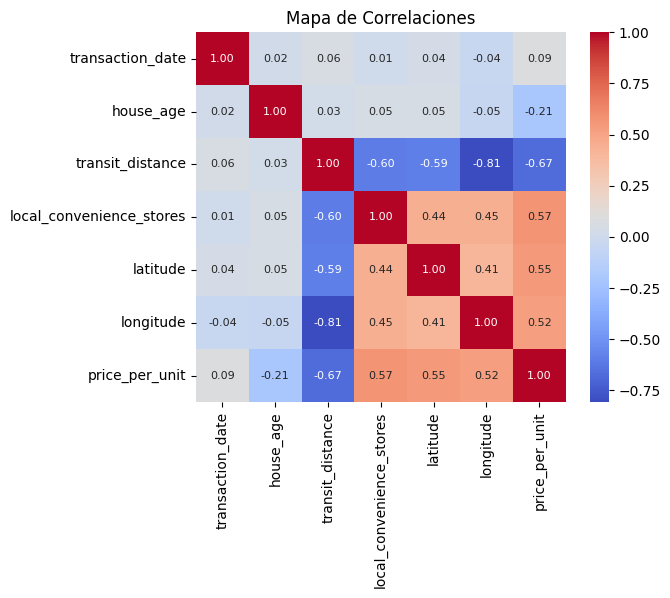

In [2]:
rc.mapa_correlaciones(data)

In [20]:
import pandas
from typing import Optional
import seaborn as sns
import matplotlib.pyplot as plt

def mapa_correlaciones(data:pandas.DataFrame, corr_type:Optional[str]=None):
    
    '''Muestra la correlacion entre variables generando un mapa de calor y
    ademas muestra el valor de correlacion entre variables
    
    data[Dataframe]     : Set de datos tipo pandas
    corr_type[String]   : tipo de correlacion que usaremos (tenemos 3 opciones)
                                - pearson
                                - kendall
                                - spearman
    
    Default:
        Correlacion de Pearson
    '''

     # Validadores
    if type(data) != type(pd.DataFrame()):
        return 'Ingrese set de datos tipo pandas'
    # ------------------------------------------------------------------

    corr_opcions = ['pearson', 'kendall', 'spearman']
    if corr_type is None:
        corr = data.corr(method= 'pearson')
    else: 
        if corr_type in corr_opcions:
            corr = data.corr(method = corr_type)
        else:
            return 'El tipo de correlacion ingresada es incorrecta'
    sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm').set_title('Mapa de Correlaciones')
    plt.show()


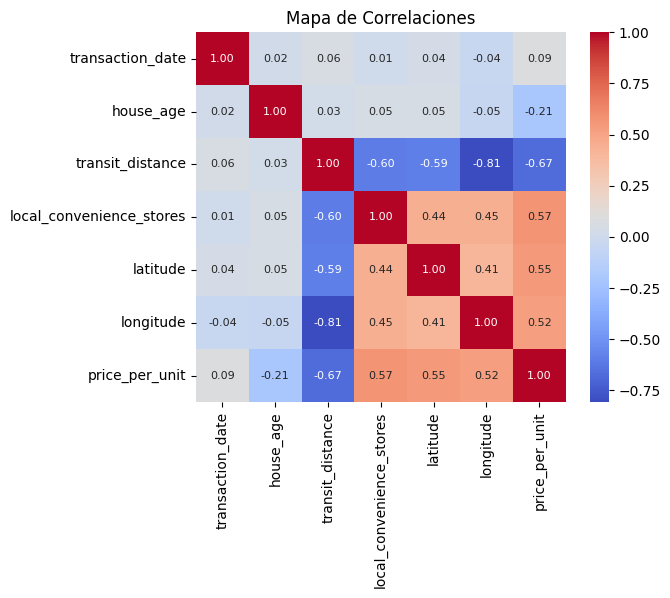

In [22]:
mapa_correlaciones(data = data, corr_type='pearson')

In [4]:

help(rc.histogram)


Help on function histogram in module graphing:

histogram(df: pandas.core.frame.DataFrame, label_x: Optional[str] = None, label_y: Optional[str] = None, label_colour: Optional[str] = None, nbins: Optional[int] = None, title=None, include_boxplot=False, histfunc: Optional[str] = None, show: bool = False)
    Creates a 2D histogram and optionally shows it. Returns the figure for that histogram.
    
    Note that if calling this from jupyter notebooks and not capturing the output
    it will appear on screen as though `.show()` has been called
    
    df: The data
    label_x: What to bin by. Defaults to df.columns[0]
    label_y: If provided, the sum of these numbers becomes the y axis. Defaults to count of label_x
    label_colour: If provided, creates a stacked histogram, splitting each bar by this column
    title: Plot title
    nbins: the number of bins to show. None for automatic
    histfunc: How to calculate y. See plotly for options
    show:   appears on screen. NB that this 

In [6]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [3]:
rc.histogram(data,label_x='transaction_date',label_colour='local_convenience_stores')

In [4]:
import graphing as gr

gr.multiple_histogram(data, label_x='transaction_date', label_group='local_convenience_stores')

In [ ]:
gr.line_2D()